In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [39]:
crime= pd.read_csv("D:\dinesh document\EXCELR\Data Science\Assingment\Clustering_Assingment\crime_data.csv")

In [40]:
crime.head(2)

,US_region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5


In [41]:
# Normalization function
def norm_func(data_column):
   x=(data_column-data_column.min())/(data_column.max()-data_column.min())
   return(x)

In [42]:
# Normalized data frame (considering the numerical part of data)
df_norm=norm_func(crime.iloc[:,1:])

In [43]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [44]:
# create dendrogram
#dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'),labels=crime['niv'].values)

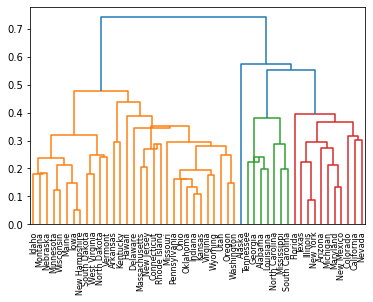

In [45]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'),labels=crime['US_region'].values)

In [46]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [47]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [48]:
#Clucrimesters

In [49]:
crime_cluster = crime.copy()
crime_cluster['h_clusterid'] = Clusters

In [50]:
crime_cluster

,US_region,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [52]:
# Use groupby and
x=crime_cluster.groupby('h_clusterid')
x.median()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,7.2,156,66,20.0
1,5.9,238,72,15.8
2,15.4,335,80,31.9
3,10.0,263,48,44.5


In [53]:
crime_cluster.loc[17]

US_region      Louisiana
Murder              15.4
Assault              249
UrbanPop              66
Rape                22.2
h_clusterid            0
Name: 17, dtype: object

### KMeans

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
# Standardisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])
scaled_crime_df# Standardisation function 

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

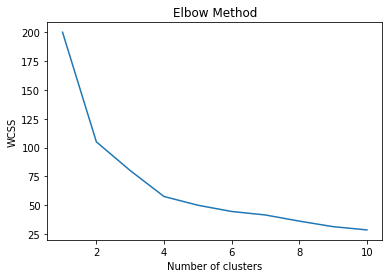

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
wcss

[200.0,
 104.96163315756871,
 80.0657554011071,
 57.55425863091104,
 49.99384281326749,
 44.56379442778553,
 41.5222111768058,
 36.20133115519301,
 31.394760162042317,
 28.56595072868119]

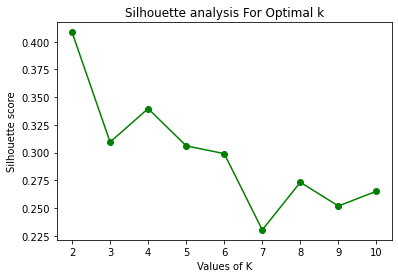

In [58]:
silhouette_avg = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(scaled_crime_df, cluster_labels))
plt.plot(range(2, 11),silhouette_avg,'go-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [59]:
silhouette_avg

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30612803169146263,
 0.29910456843899946,
 0.23035904501364113,
 0.2732934287338534,
 0.2518939934580804,
 0.2652233759332704]

In [60]:
kmeans = KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_crime_df)

In [61]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=3, random_state=42)

In [62]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [64]:
#Assign clusters to the data set
#crime_k_means = crime.copy()
crime_cluster['k_means_id'] = clusters_new.labels_

In [65]:
crime_cluster.head()

,US_region,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_id
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,1


In [67]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524]])

In [68]:
crime_cluster.groupby('k_means_id').agg(['mean']).reset_index()

,k_means_id,Murder,Assault,UrbanPop,Rape,h_clusterid
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875,73.875000,18.78125,0.0625
1,1,12.165000,255.250,68.400000,29.16500,0.2500
2,2,3.971429,86.500,51.928571,12.70000,0.0000


In [69]:
crime_cluster[crime_cluster['k_means_id']==2]

,US_region,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_id
3,Arkansas,8.8,190,50,19.5,0,2
11,Idaho,2.6,120,54,14.2,0,2
14,Iowa,2.2,56,57,11.3,0,2
16,Kentucky,9.7,109,52,16.3,0,2
18,Maine,2.1,83,51,7.8,0,2
22,Minnesota,2.7,72,66,14.9,0,2
25,Montana,6.0,109,53,16.4,0,2
26,Nebraska,4.3,102,62,16.5,0,2
28,New Hampshire,2.1,57,56,9.5,0,2
33,North Dakota,0.8,45,44,7.3,0,2


In [70]:
crime_cluster[crime_cluster['k_means_id']==0]

,US_region,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_id
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,0,0
13,Indiana,7.2,113,65,21.0,0,0
15,Kansas,6.0,115,66,18.0,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
29,New Jersey,7.4,159,89,18.8,0,0
34,Ohio,7.3,120,75,21.4,0,0
35,Oklahoma,6.6,151,68,20.0,0,0
36,Oregon,4.9,159,67,29.3,0,0


### DBSCAN

In [71]:
from sklearn.cluster import DBSCAN

In [72]:
dbscan = DBSCAN(eps = 2, min_samples=3)
dbscan.fit_predict(scaled_crime_df)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [73]:
# Noisy samples are given  the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [74]:
crime_cluster['db_cluster'] = dbscan.labels_

In [76]:
crime_cluster

,US_region,Murder,Assault,UrbanPop,Rape,h_clusterid,k_means_id,db_cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,3,1,-1
2,Arizona,8.1,294,80,31.0,0,1,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,0,1,0
5,Colorado,7.9,204,78,38.7,0,1,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,1,0,0
8,Florida,15.4,335,80,31.9,2,1,0
9,Georgia,17.4,211,60,25.8,0,1,0


In [86]:
print("\nCluster id for hierarchical clustering\n")
print(crime_cluster['h_clusterid'].value_counts())
print("\nCluster id for kmeans clustering\n")
print(crime_cluster['k_means_id'].value_counts())
print("\nCluster id for dbscan clustering\n")
print(crime_cluster['db_cluster'].value_counts())


Cluster id for hierarchical clustering

0    47
3     1
2     1
1     1
Name: h_clusterid, dtype: int64

Cluster id for kmeans clustering

1    20
0    16
2    14
Name: k_means_id, dtype: int64

Cluster id for dbscan clustering

 0    49
-1     1
Name: db_cluster, dtype: int64


### Inference

#### 1. Hierarchical clustering 

##### Hierarchical clustering creates 4 clusters of data. 47 data points are in 1 group whose label is 0 and other 3 data points are in 3 groups with label 1, 2, 3

#### 2. KMEANS clustering

##### KMEANS clustering creates 3 cluster of data. 20 data points are in one group whose label is 1 and 16 data points are in one group  whose label is 0 and 14 data points are inone group whose label is 2.

#### 3. DBSCAN clustering

##### DBSCAN clustering create 2 cluster of data . 49 data points are in one group whose label is 0 and 1 data point is outlier whose label is -1.